# Capstone Project
# The Battle of Neighberhoods in Paris: Electrical Vehicle Charging Stations


### We will begin by answering the first question in our introduction: Are there sufficient customers that have electrical vehicles in Paris ?
### We will use Web Scraping to extract table of number of electrical vehicles in Paris from 2010 to 2020 from the "Wikipedia" web site

In [182]:
#Let's import libraries to use web scraping and manipulate data frames
from bs4 import BeautifulSoup 
import requests 
import pandas as pd

We will input the web adress and use BeautifulSoup to get all tables of the web page

In [28]:
url='https://fr.wikipedia.org/wiki/Voiture_%C3%A9lectrique_en_France'
html_data=requests.get(url).text
soup=BeautifulSoup(html_data,'html5lib')

tables=soup.find_all('table')

We will search for the right table by using the key word "Voitures particulières" wich means Electrical cars in english

In [29]:
for i,table in enumerate(tables):
    if ('Voitures particulières' in str(table)):
        table_index=i

Now we define our dataframe with 4 columns and extract data from the table detected with table index

In [30]:
EV=pd.DataFrame(columns=["Year", "Electrical_cars", "Market_share", "Electrical_trucks"])

for row in tables[0].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col != []):
        Year =col[0].text.strip()
        Electrical_cars =col[1].text.strip()
        Market_share =col[2].text.strip()
        Electrical_trucks =col[3].text.strip()
        

        EV = EV.append({"Year":Year, "Electrical_cars":Electrical_cars, "Market_share":Market_share, "Electrical_trucks":Electrical_trucks}, ignore_index=True)

Let's see the shape of the dataframe

In [31]:
EV.shape

(11, 4)

Let's see the first 5 rows of the dataframe

In [32]:
EV.head()

,Year,Electrical_cars,Market_share,Electrical_trucks
0,2010,180[17],"0,01 %",796
1,2011,2 630[17],"0,12 %",1 683
2,2012,5 663[17],"0,30 %",3 651
3,2013,8 779[18],"0,49 %",5 175
4,2014,10 560[19],"0,59 %",4 485


## Data wrangling

We will clean our data frame by retreiving the symbols "[17], [18]" wich were refering to sources of information in the wikipedia web site. We are interested only in the 3 columns Year, Electrical cars and Electrical trucks

In [33]:
for i,row in enumerate(EV['Year']):
    if ('[24]' in row):
        EV['Year'].loc[i]=row.replace('[24]', '')
    elif ('[25]' in row):
         EV['Year'].loc[i]=row.replace('[25]', '')
    elif ('[26]' in row):
         EV['Year'].loc[i]=row.replace('[26]', '')

In [34]:
for i,row in enumerate(EV['Electrical_cars']):
    if ('[17]' in row):
        EV['Electrical_cars'].loc[i]=row.replace('[17]', '')
    elif ('[18]' in row):
         EV['Electrical_cars'].loc[i]=row.replace('[18]', '')
    elif ('[19]' in row):
         EV['Electrical_cars'].loc[i]=row.replace('[19]', '')
    elif ('[20]' in row):
         EV['Electrical_cars'].loc[i]=row.replace('[20]', '')
    elif ('[21]' in row):
         EV['Electrical_cars'].loc[i]=row.replace('[21]', '')

In [35]:
for i,row in enumerate(EV['Electrical_trucks']):
    if ('[22]' in row):
        EV['Electrical_trucks'].loc[i]=row.replace('[22]', '')

Let's the changes in our data frame

In [36]:
EV

,Year,Electrical_cars,Market_share,Electrical_trucks
0,2010,180,"0,01 %",796
1,2011,2 630,"0,12 %",1 683
2,2012,5 663,"0,30 %",3 651
3,2013,8 779,"0,49 %",5 175
4,2014,10 560,"0,59 %",4 485
5,2015,17 266,"0,90 %",4 949
6,2016,21 751,"1,08 %",5 556
7,2017,24 910,"1,18 %[23]",6 011
8,2018,31 055,"1,49 %",8 103
9,2019,42 763,"1,9 %",7 958


Let's drop the "Market share" column to simplify the data frame and convert it easily to "integer"

In [37]:
EV.drop('Market_share', axis=1, inplace=True)

In [38]:
EV.dtypes

Year                 object
Electrical_cars      object
Electrical_trucks    object
dtype: object

We should retrieve spaces from numbers in our data frame in order to use "astype('int')" for the two columns "Electrical cars" and "Electrical trucks"

In [39]:
for i,row in enumerate(EV['Electrical_cars']):
    elem=row.split()
    if(i !=0 ):
        EV['Electrical_cars'].loc[i]=elem[0]+elem[1]
        
for i,row in enumerate(EV['Electrical_trucks']):
    elem2=row.split()
    if(i !=0 ):
        EV['Electrical_trucks'].loc[i]=elem2[0]+elem2[1]

In [40]:
EV=EV.astype('int')
EV.dtypes

Year                 int64
Electrical_cars      int64
Electrical_trucks    int64
dtype: object

Now we can see, we have our data frame with the right data type and the three useful columns that we will use to predict the number of cars and trucks in the future years

In [41]:
EV

,Year,Electrical_cars,Electrical_trucks
0,2010,180,796
1,2011,2630,1683
2,2012,5663,3651
3,2013,8779,5175
4,2014,10560,4485
5,2015,17266,4949
6,2016,21751,5556
7,2017,24910,6011
8,2018,31055,8103
9,2019,42763,7958


## Data Analysis

Let's plot our data and try to understand the correlation between features

In [42]:
# We import the libraries for ploting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

We will use a scatter plot to see relationship between features

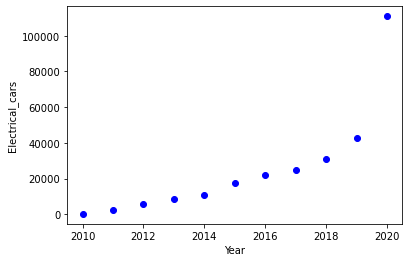

In [50]:
plt.scatter(EV.Year, EV.Electrical_cars, color='blue')
plt.xlabel("Year")
plt.ylabel("Electrical_cars")
plt.show()

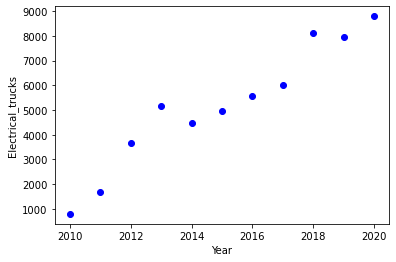

In [51]:
plt.scatter(EV.Year, EV.Electrical_trucks, color='blue')
plt.xlabel("Year")
plt.ylabel("Electrical_trucks")
plt.show()

We can see that we have a positive correlation between Electrical cars and trucks with year

## Modeling

Since we have continuous values in our features and we want to predict a numerical value, we have a supervised learning and we will use a simple linear regression to predict the number of electrical cars and trucks for the year 2021. The target is "Electrical_trucks", and the feature are "Year". We won't predict the Electrical cars because we can already be sure that the number of those cars is increasing with a very hight rate, we will only predict the Electrical trucks.

In [161]:
# Let's import the libraries
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split


X=EV[['Year']]
y=EV['Electrical_trucks']

# We will split data into train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

regr = linear_model.LinearRegression()
regr.fit (X_train, y_train)

# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [696.02903226]
Intercept:  -1397197.5032258062


In [162]:
_y_test=regr.predict(X_test)
_y_test

array([8085.11290323, 1820.8516129 ])

## Model Evaluation

We will use the R-squared metric to evaluate our model. The closer to 1 the better our model is

In [163]:
# Let's import the libraries
from sklearn.metrics import r2_score

print("R2-score: %.2f" % r2_score(y_test , _y_test) )

R2-score: 0.96


we have 0.96 as R-squared metric, it means that our model is well fitted to predict the number of Electrical trucks

## Model Deployment

Let's predict the number of Electrical trucks for the years 2021 and 2022

In [170]:
d = {'Year': [2021, 2022]}
X_predict=pd.DataFrame(data=d)
y_result=regr.predict(X_predict)
y_result

array([ 9477.17096774, 10173.2       ])

we will have year_2021=9477 Electrical trucks and year_2022=10173 Electrical trucks. It means that the number of Electrical trucks will inscrease the coming years.

## Let's answer the last question: What are the places in the city that have not sufficient charging stations ?

In [1]:
# Let's import the required libraries
import json 
#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim 
import requests 
from pandas.io.json import json_normalize 
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
#!conda install -c conda-forge folium=0.5.0 --yes
import folium 

We will construct the dataframe that will contain the postal code of neighberhoods of paris from the csv file "quartier_paris.csv"

In [186]:
df = pd.read_csv('https://opendata.paris.fr/explore/dataset/quartier_paris/download/?format=csv&timezone=Europe/Berlin&lang=fr&use_labels_for_header=true&csv_separator=%3B', sep=';')
# We are only interested on two useful columns for neighborhood names and geometry
df=df[['L_QU', 'Geometry X Y']]
df.head()

,L_QU,Geometry X Y
0,Monnaie,"48.8543844036,2.34003537113"
1,Odéon,"48.8478006293,2.33633882759"
2,Champs-Elysées,"48.8670744922,2.30865168468"
3,Maison-Blanche,"48.8231278057,2.35243314954"
4,Croulebarbe,"48.8337336761,2.34767304607"


we have to extract the latitude and longitude from the column Geometry X Y

In [188]:
paris_info=pd.DataFrame(columns=['Neighborhood', 'Latitude', 'Longitude'])

paris_info['Neighborhood']=df['L_QU']

for i,row in enumerate(df['Geometry X Y']):
    elem=row.split(',')
    paris_info['Latitude'].loc[i]=elem[0]
    paris_info['Longitude'].loc[i]=elem[1]
    
paris_info.head()

,Neighborhood,Latitude,Longitude
0,Monnaie,48.8543844036,2.34003537113
1,Odéon,48.8478006293,2.33633882759
2,Champs-Elysées,48.8670744922,2.30865168468
3,Maison-Blanche,48.8231278057,2.35243314954
4,Croulebarbe,48.8337336761,2.34767304607


In [189]:
paris_info.shape

(80, 3)

Now we have a data frame with 80 neighborhoods with their latitude and longitude

We have to convert str to float for the two columns 'Latitude' and 'longitude'

In [195]:
paris_info[['Latitude', 'Longitude']]=paris_info[['Latitude', 'Longitude']].astype('float')
paris_info.dtypes

Neighborhood     object
Latitude        float64
Longitude       float64
dtype: object

Let's get the coordinates of Paris and then create the map of the city

In [190]:
address = 'Paris'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('Paris location: ', latitude, longitude)

Paris location:  48.8566969 2.3514616


In [199]:
# create map of Paris
map_paris = folium.Map(location=[latitude, longitude], zoom_start=13)

# add markers to map of neighborhoods

for lat, lng, label in zip(paris_info['Latitude'], paris_info['Longitude'], paris_info['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=2,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_paris)  
    
map_paris

we will explore neighberhoods using Foursquare. We first define our credentials and the version 

In [200]:
CLIENT_ID = '3C5MYXZLLSDM0NUINSM5VCD3UDR1FT4SH33HY05G1JH2DCLC' 
CLIENT_SECRET = 'NI1JABVHIRKNLLOD3AH3XAXRUYXC5B4XQV3SYORIWVRZLQVA' 
VERSION = '20180605' 
LIMIT = 100 

we will use the next function in order to explore all neigherhoods in Toronto and get the nearby venues

In [201]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

paris_venues = getNearbyVenues(names=paris_info['Neighborhood'],
                                   latitudes=paris_info['Latitude'],
                                   longitudes=paris_info['Longitude']
                                  )

Let's see how many venues were returned for each neighberhood

In [202]:
paris_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Amérique,12,12,12,12,12,12
Archives,100,100,100,100,100,100
Arsenal,68,68,68,68,68,68
Arts-et-Métiers,100,100,100,100,100,100
Auteuil,15,15,15,15,15,15
...,...,...,...,...,...,...
Sorbonne,100,100,100,100,100,100
Ternes,66,66,66,66,66,66
Val-de-Grâce,45,45,45,45,45,45


we will group by Neighberhood and take the mean of frequency of occurence of each category and call the dataframe toronto_grouped that we will use for clustering

In [203]:
# one hot encoding
paris_onehot = pd.get_dummies(paris_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
paris_onehot['Neighborhood'] = paris_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [paris_onehot.columns[-1]] + list(paris_onehot.columns[:-1])
paris_onehot = paris_onehot[fixed_columns]

paris_grouped = paris_onehot.groupby('Neighborhood').mean().reset_index()
paris_grouped.head()

,Neighborhood,Accessories Store,Afghan Restaurant,African Restaurant,Alsatian Restaurant,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,...,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,Amérique,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,...,0.000000,0.0,0.0,0.00,0.000000,0.00,0.0,0.0,0.0,0.0
1,Archives,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.05,...,0.000000,0.0,0.0,0.00,0.010000,0.00,0.0,0.0,0.0,0.0
2,Arsenal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,...,0.029412,0.0,0.0,0.00,0.014706,0.00,0.0,0.0,0.0,0.0
3,Arts-et-Métiers,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.02,...,0.020000,0.0,0.0,0.03,0.050000,0.02,0.0,0.0,0.0,0.0
4,Auteuil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,...,0.000000,0.0,0.0,0.00,0.000000,0.00,0.0,0.0,0.0,0.0


Here we are interested only on cars stations, we will simplify the data frame

In [246]:
paris_grouped_station=paris_grouped[['Neighborhood', 'Gas Station']]

we will use the K-means to cluster our data in the folium map

In [248]:
# set number of clusters
kclusters = 5

paris_grouped_clustering = paris_grouped_station.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(paris_grouped_clustering)
labels = kmeans.labels_
paris_grouped_clustering["Labels"] = labels
paris_grouped_clustering.head()

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=13)

markers_colors = []
for lat, lon, poi, cluster in zip(paris_info['Latitude'], paris_info['Longitude'], paris_info['Neighborhood'], paris_grouped_clustering['Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=2,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:7: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.


In [250]:
paris_grouped_clustering['Labels'].value_counts()

0    78
2     1
1     1
Name: Labels, dtype: int64

### The result of the clustering is that there is not enough Elecrical Charging Stations at the city of Paris, execpt two Neighborhoods "Muette" and "Javel". The stekholders can try to set their Elecrical Charging stations at any Neighborhood they want except the two identified "Muette" and "Javel" neighborhoods to avoid competition with other companies